In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [74]:
internet_education = pd.read_csv('../data/internet_education.csv')
internet_education = internet_education.drop(columns=['Unnamed: 0', 'Continent'], axis=1)
internet_education.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Number_Students_total,Number_Students_female,Percent_female
0,Afghanistan,2014,1795.735834,6.390000,6217756.0,2484471.0,39.957679
1,Afghanistan,2013,1807.762344,5.900000,5986268.0,2401135.0,40.110717
2,Afghanistan,2012,1772.764974,5.454545,5767543.0,2348306.0,40.715882
3,Afghanistan,2011,1626.764793,5.000000,5291624.0,2141833.0,40.475911
4,Afghanistan,2010,1671.581238,4.000000,5279326.0,2076942.0,39.341045


In [77]:
education_proportion = pd.read_csv('../data/education_proportion_change_final.csv')
education_proportion.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,Change_gender,Change_internet
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.894841,37.783095,38.571309,39.341045,40.475911,40.715882,40.110717,39.957679,NaN,NaN
1,Albania,48.076108,NaN,NaN,NaN,NaN,47.933671,48.001169,48.067727,NaN,...,48.075193,47.857150,47.606119,47.564963,47.424650,47.228931,47.147016,47.317086,-0.759022,60.10
2,Algeria,44.661278,NaN,NaN,NaN,45.653021,45.868001,46.115622,46.295776,NaN,...,47.236419,47.308740,47.287024,47.335137,47.365335,47.544985,47.661308,47.727582,3.066304,18.09
3,Angola,48.024351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.214664,...,NaN,46.123956,45.842513,44.738411,38.912048,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.906561,48.287494,48.332742,47.334281,47.673883,48.215823,NaN,48.122297,NaN,NaN


In [83]:
education_proportion['Change_gender'].notna().sum()

66

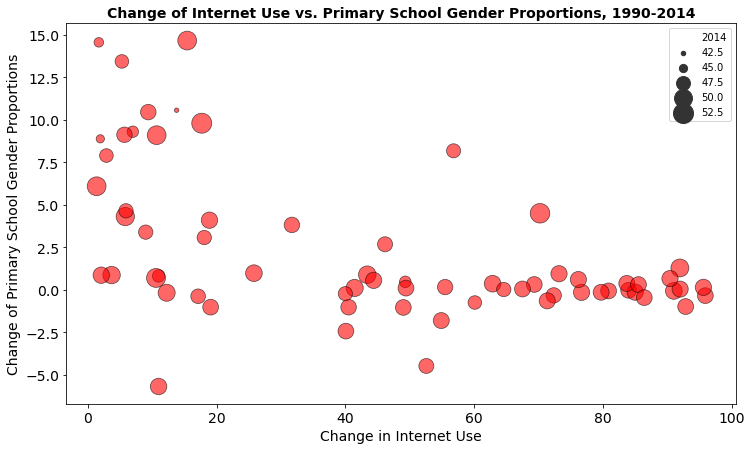

In [54]:
fontsize = 14

plt.figure(figsize = (12,7))
sns.scatterplot(data = education_proportion, x = 'Change_internet', y = 'Change_gender', 
                size = '2014', sizes = (20, 400), alpha = 0.6, color='red', edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Change in Internet Use', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Change of Primary School Gender Proportions', fontsize = fontsize)
plt.title('Change of Internet Use vs. Primary School Gender Proportions, 1990-2014', fontsize = fontsize, fontweight = 'bold');

In [ ]:
#CREATE FACETGRID TO COMPARE CAUSES OF TOP 5 COUNTRIES WITH INCREASING GENDER EQUITY

In [26]:
education_top_five_list = education_proportion.sort_values('Change_gender', ascending=False).head(5)['Country']
education_top_five = internet_education[internet_education['Country'].isin(education_top_five_list)]
education_top_five

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Number_Students_total,Number_Students_female,Percent_female
288,288,Benin,2014,2001.052000,Africa,5.300000,2133330.0,1010029.0,47.345183
289,289,Benin,2013,1934.622615,Africa,4.900000,2064031.0,972325.0,47.108062
290,290,Benin,2012,1855.936331,Africa,4.500000,1987182.0,931875.0,46.894296
291,291,Benin,2011,1820.889304,Africa,4.148323,1869379.0,870213.0,46.550913
292,292,Benin,2010,1818.778461,Africa,3.130000,1787940.0,830785.0,46.466045
...,...,...,...,...,...,...,...,...,...
1975,1975,Pakistan,2003,3490.308899,Asia,5.041158,15093960.0,6132096.0,40.626158
1976,1976,Pakistan,2002,3407.858191,Asia,2.577427,14489107.0,5670020.0,39.132985
1977,1977,Pakistan,2001,3382.174120,Asia,1.318551,14204954.0,5558843.0,39.133129
1978,1978,Pakistan,1998,3322.002667,Asia,0.043948,14000000.0,4600000.0,32.857143


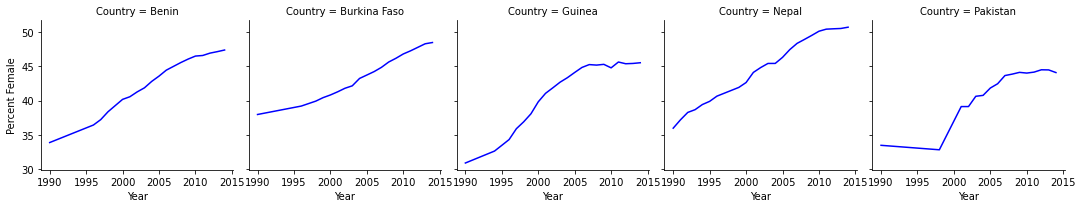

In [71]:
g = sns.FacetGrid(education_top_five, col='Country')
g.map(sns.lineplot, 'Year', 'Percent_female', color='blue')
g.set_axis_labels('Year', 'Percent Female');

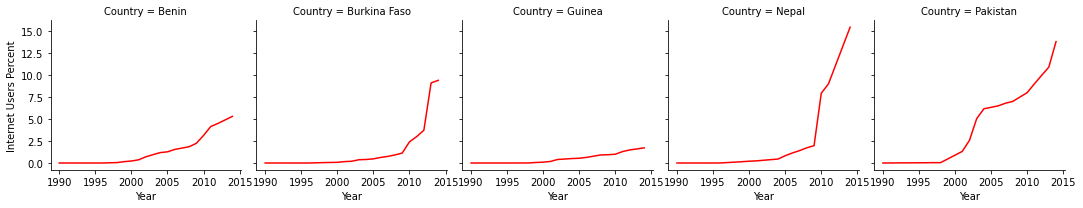

In [66]:
#NOTE THE SCALE OF INTERNET USERS - ALL ARE STILL UNDER 15%
g = sns.FacetGrid(education_top_five, col='Country')
g.map(sns.lineplot, 'Year', 'Internet_Users_Pct', color='red')
g.set_axis_labels('Year', 'Internet Users Percent');

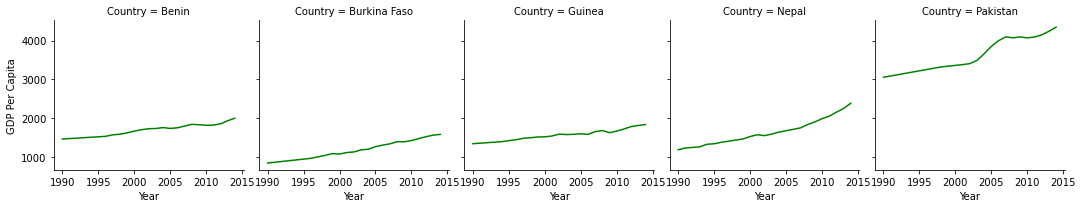

In [68]:
#NOTE GDP PER CAPITA - MOST ARE UNDER $4,000
g = sns.FacetGrid(education_top_five, col='Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita', color='green')
g.set_axis_labels('Year', 'GDP Per Capita');

In [31]:
#CREATE FACETGRID TO COMPARE CAUSES OF 5 COUNTRIES WITH WORSENING GENDER EQUITY

In [32]:
education_bottom_five_list = education_proportion.sort_values('Change_gender', ascending=True).head(5)['Country']
education_bottom_five = internet_education[internet_education['Country'].isin(education_bottom_five_list)]
education_bottom_five

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Number_Students_total,Number_Students_female,Percent_female
578,578,Colombia,2014,12887.599282,South America,52.570000,4542644.0,2184885.0,48.097209
579,579,Colombia,2013,12430.647146,South America,51.700000,4708466.0,2272750.0,48.269436
580,580,Colombia,2012,11996.216518,South America,48.980000,4742456.0,2280941.0,48.096197
581,581,Colombia,2011,11650.199493,South America,40.350916,4924346.0,2367531.0,48.078080
582,582,Colombia,2010,10956.945852,South America,36.500000,5084972.0,2466264.0,48.501034
...,...,...,...,...,...,...,...,...,...
2371,2371,Suriname,2006,12477.088850,South America,9.499627,66121.0,31960.0,48.335627
2372,2372,Suriname,2005,11931.496369,South America,6.403086,65527.0,31663.0,48.320540
2373,2373,Suriname,2002,10253.239059,South America,4.161569,64023.0,31157.0,48.665323
2374,2374,Suriname,2001,10092.338092,South America,3.064448,64852.0,31742.0,48.945291


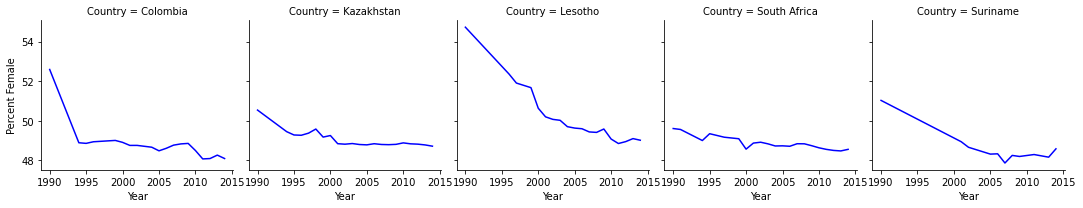

In [65]:
#NOTE STARTING POINTS - MOST START AT OR ABOVE 50, BUT END AROUND 48-49%.
g = sns.FacetGrid(education_bottom_five, col='Country')
g.map(sns.lineplot, 'Year', 'Percent_female', color='blue')
g.set_axis_labels('Year', 'Percent Female');

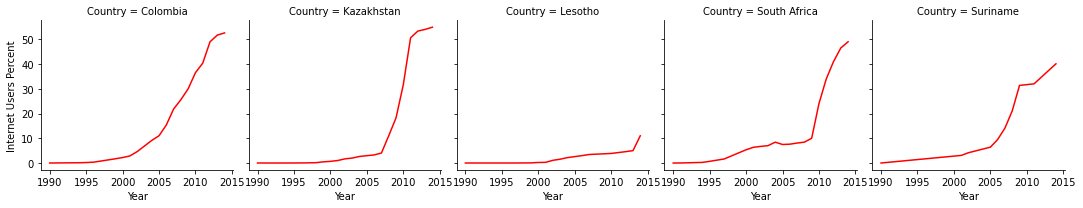

In [67]:
#NOTE INTERNET USERS PCT - MOST ARE UP TO ABOUT 50%
g = sns.FacetGrid(education_bottom_five, col='Country')
g.map(sns.lineplot, 'Year', 'Internet_Users_Pct', color='red')
g.set_axis_labels('Year', 'Internet Users Percent');

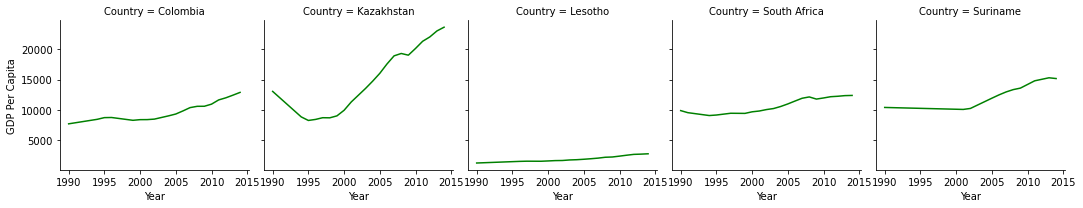

In [69]:
#NOTE GDP PER CAPITA - MUCH HIGHER THAN COUNTRIES WITH GAINING EQUITY
g = sns.FacetGrid(education_bottom_five, col='Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita', color='green')
g.set_axis_labels('Year', 'GDP Per Capita');